In [3]:
from PIL import Image
import cv2
import scipy.ndimage 
import numpy as np
from matplotlib import pyplot as plt

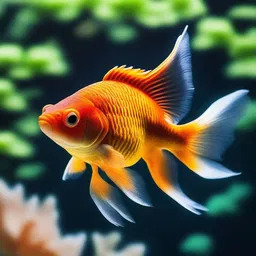

(256, 256)


In [10]:
img = Image.open("../data/original/image1.jpg")
display(img)
print(img.size)

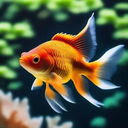

(128, 128)


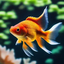

(64, 64)


In [16]:
img2 = img.resize((int(img.size[0]/2), int(img.size[1]/2)), Image.Resampling.LANCZOS)
img3 = img2.resize((int(img2.size[0]/2), int(img2.size[1]/2)), Image.Resampling.LANCZOS)
display(img2)
print(img2.size)
display(img3)
print(img3.size)
img3.save("../data/downsampled/image1.jpg")
